<a href="https://colab.research.google.com/github/AchmadLutfi196/computingartificial/blob/main/UAS_KK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. SVM dengan Kernel Linear
Diberikan 10 buah data dalam bentuk koordinat dua dimensi (x₁, x₂), yang terbagi ke dalam
dua kelas (misalnya kelas A dan kelas B).
Tugas Anda:
1. Buatlah persamaan hyperplane dengan menggunakan kernel linear yang dapat
memisahkan kedua kelas tersebut.
2. Tentukan nilai vektor bobot (w) dan bias (b) dari hyperplane tersebut.
3. Tampilkan visualisasi data dan garis pemisah (hyperplane) menggunakan Python
(opsional jika ada).
Referensi: https://www.youtube.com/watch?v=48hZq0xhbtM (detik 9.54)

### 1.1 Buatlah persamaan hyperplane dengan menggunakan kernel linear yang dapat memisahkan kedua kelas tersebut.

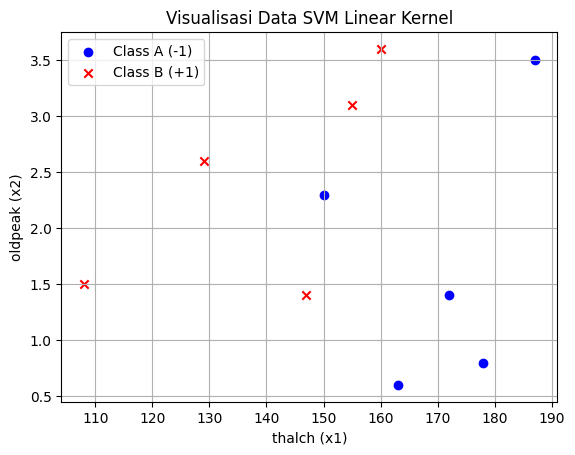

In [ ]:
# Data manual: (x1 = thalch, x2 = oldpeak, label)

data = [
    (150, 2.3, -1),
    (108, 1.5,  1),
    (129, 2.6,  1),
    (187, 3.5, -1),
    (172, 1.4, -1),
    (178, 0.8, -1),
    (160, 3.6,  1),
    (163, 0.6, -1),
    (147, 1.4,  1),
    (155, 3.1,  1)
]

import matplotlib.pyplot as plt

# Pisahkan data per kelas:
x1_classA = []
x2_classA = []
x1_classB = []
x2_classB = []

for x1, x2, label in data:
    if label == -1:  # Class A
        x1_classA.append(x1)
        x2_classA.append(x2)
    else:  # Class B
        x1_classB.append(x1)
        x2_classB.append(x2)

# Plot
plt.scatter(x1_classA, x2_classA, color='blue', marker='o', label='Class A (-1)')
plt.scatter(x1_classB, x2_classB, color='red', marker='x', label='Class B (+1)')

plt.xlabel('thalch (x1)')
plt.ylabel('oldpeak (x2)')
plt.title('Visualisasi Data SVM Linear Kernel')
plt.legend()
plt.grid(True)
plt.show()


### 1.2 Tentukan nilai vektor bobot (w) dan bias (b) dari hyperplane tersebut.

In [ ]:
# Data: (x1, x2, label)
data = [
    (150, 2.3, -1),
    (108, 1.5,  1),
    (129, 2.6,  1),
    (187, 3.5, -1),
    (172, 1.4, -1),
    (178, 0.8, -1),
    (160, 3.6,  1),
    (163, 0.6, -1),
    (147, 1.4,  1),
    (155, 3.1,  1)
]

# Hyperparameter
learning_rate = 0.0001
epochs = 1000

# Inisialisasi bobot dan bias
w1 = 0
w2 = 0
b = 0

# Training
for epoch in range(epochs):
    error_count = 0
    for x1, x2, label in data:
        # Prediksi:
        y_pred = w1 * x1 + w2 * x2 + b
        pred_label = 1 if y_pred >= 0 else -1

        # Jika salah, update
        if pred_label != label:
            w1 += learning_rate * label * x1
            w2 += learning_rate * label * x2
            b   += learning_rate * label
            error_count += 1

    # Print setiap epoch
    print(f"Epoch {epoch+1}: error_count = {error_count}")

    # Jika tidak ada error, selesai
    if error_count == 0:
        print("Training selesai di epoch", epoch+1)
        break

# Akhir: print w dan b
print("\nHasil akhir hyperplane:")
print(f"w1 = {w1}")
print(f"w2 = {w2}")
print(f"b  = {b}")


Epoch 1: error_count = 7
Epoch 2: error_count = 5
Epoch 3: error_count = 6
Epoch 4: error_count = 7
Epoch 5: error_count = 7
Epoch 6: error_count = 4
Epoch 7: error_count = 6
Epoch 8: error_count = 7
Epoch 9: error_count = 7
Epoch 10: error_count = 4
Epoch 11: error_count = 6
Epoch 12: error_count = 7
Epoch 13: error_count = 7
Epoch 14: error_count = 6
Epoch 15: error_count = 5
Epoch 16: error_count = 6
Epoch 17: error_count = 5
Epoch 18: error_count = 6
Epoch 19: error_count = 5
Epoch 20: error_count = 6
Epoch 21: error_count = 5
Epoch 22: error_count = 6
Epoch 23: error_count = 7
Epoch 24: error_count = 7
Epoch 25: error_count = 4
Epoch 26: error_count = 6
Epoch 27: error_count = 7
Epoch 28: error_count = 7
Epoch 29: error_count = 6
Epoch 30: error_count = 5
Epoch 31: error_count = 6
Epoch 32: error_count = 5
Epoch 33: error_count = 6
Epoch 34: error_count = 5
Epoch 35: error_count = 6
Epoch 36: error_count = 5
Epoch 37: error_count = 6
Epoch 38: error_count = 7
Epoch 39: error_count

### 1.3  Tampilkan visualisasi data dan garis pemisah (hyperplane) menggunakan Python (opsional jika ada).

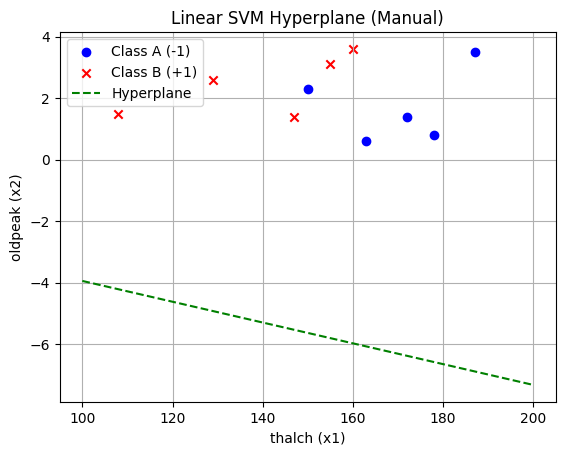

In [ ]:
import matplotlib.pyplot as plt

# Pisahkan data per kelas
x1_classA = []
x2_classA = []
x1_classB = []
x2_classB = []

for x1, x2, label in data:
    if label == -1:
        x1_classA.append(x1)
        x2_classA.append(x2)
    else:
        x1_classB.append(x1)
        x2_classB.append(x2)

# Plot titik-titik
plt.scatter(x1_classA, x2_classA, color='blue', marker='o', label='Class A (-1)')
plt.scatter(x1_classB, x2_classB, color='red', marker='x', label='Class B (+1)')

# Buat garis hyperplane:
x1_vals = [100, 200]  # Range x1 yang masuk akal
x2_vals = [-(w1/w2) * x + -(b/w2) for x in x1_vals]

plt.plot(x1_vals, x2_vals, color='green', linestyle='--', label='Hyperplane')

# Tambahan: label + legend
plt.xlabel('thalch (x1)')
plt.ylabel('oldpeak (x2)')
plt.title('Linear SVM Hyperplane (Manual)')
plt.legend()
plt.grid(True)
plt.show()


# 2. JST
Ambilah sebuah dataset dari Kaggle. Lakukan klasifikasi terhadap data tersebut menjadi
tiga kelas, dengan syarat jumlah fitur minimal sebanyak lima. Gunakan metode klasifikasi
yang sesuai Jaringan Syaraf Tiruan
Referensi: Perhitungan JST

### Step 1: Input data (3 data, 5 fitur)

In [ ]:
# Data x1
x1 = [52, 125, 212, 168, 1.0]
t1 = [0, 1, 0]  # kelas 1

# Data x2
x2 = [56, 140, 294, 153, 1.3]
t2 = [1, 0, 0]  # kelas 0

# Data x3
x3 = [65, 150, 225, 114, 2.6]
t3 = [0, 0, 1]  # kelas 2

print("Data x1:", x1, "Target:", t1)
print("Data x2:", x2, "Target:", t2)
print("Data x3:", x3, "Target:", t3)

Data x1: [52, 125, 212, 168, 1.0] Target: [0, 1, 0]
Data x2: [56, 140, 294, 153, 1.3] Target: [1, 0, 0]
Data x3: [65, 150, 225, 114, 2.6] Target: [0, 0, 1]


### Step 2: Inisialisasi bobot dan bias


In [ ]:
# Bobot neuron 1
w11 = 0.05
w12 = -0.02
w13 = 0.03
w14 = 0.04
w15 = 0.01

# Bobot neuron 2
w21 = -0.03
w22 = 0.06
w23 = -0.01
w24 = 0.02
w25 = 0.05

# Bobot neuron 3
w31 = 0.07
w32 = 0.01
w33 = -0.04
w34 = 0.05
w35 = -0.02

# Bias neuron
b1 = 0.1
b2 = -0.2
b3 = 0.05

print("Bobot neuron 1:", w11, w12, w13, w14, w15, "bias =", b1)
print("Bobot neuron 2:", w21, w22, w23, w24, w25, "bias =", b2)
print("Bobot neuron 3:", w31, w32, w33, w34, w35, "bias =", b3)

Bobot neuron 1: 0.05 -0.02 0.03 0.04 0.01 bias = 0.1
Bobot neuron 2: -0.03 0.06 -0.01 0.02 0.05 bias = -0.2
Bobot neuron 3: 0.07 0.01 -0.04 0.05 -0.02 bias = 0.05


### Step 3-5: Perhitungan Z (Net input), aktivasi, prediksi

In [ ]:
# Untuk Data x1
# Hitung Z
z1_x1 = x1[0]*w11 + x1[1]*w12 + x1[2]*w13 + x1[3]*w14 + x1[4]*w15 + b1
z2_x1 = x1[0]*w21 + x1[1]*w22 + x1[2]*w23 + x1[3]*w24 + x1[4]*w25 + b2
z3_x1 = x1[0]*w31 + x1[1]*w32 + x1[2]*w33 + x1[3]*w34 + x1[4]*w35 + b3

print()
print("Data x1:")
print("Data x1 - Z1 =", z1_x1)
print("Data x1 - Z2 =", z2_x1)
print("Data x1 - Z3 =", z3_x1)

# Aktivasi sigmoid
import math

a1_x1 = 1 / (1 + math.exp(-z1_x1))
a2_x1 = 1 / (1 + math.exp(-z2_x1))
a3_x1 = 1 / (1 + math.exp(-z3_x1))

print()
print("Aktivasi sigmoid Data x1:")
print("Data x1 - a1 =", a1_x1)
print("Data x1 - a2 =", a2_x1)
print("Data x1 - a3 =", a3_x1)

# Prediksi kelas
Y_x1 = [a1_x1, a2_x1, a3_x1]

if Y_x1[0] > Y_x1[1] and Y_x1[0] > Y_x1[2]:
    pred_class_x1 = 0
elif Y_x1[1] > Y_x1[0] and Y_x1[1] > Y_x1[2]:
    pred_class_x1 = 1
else:
    pred_class_x1 = 2

print("Data x1 - Prediksi kelas:", pred_class_x1)

# ============================
# Ulangi untuk Data x2

# Z
z1_x2 = x2[0]*w11 + x2[1]*w12 + x2[2]*w13 + x2[3]*w14 + x2[4]*w15 + b1
z2_x2 = x2[0]*w21 + x2[1]*w22 + x2[2]*w23 + x2[3]*w24 + x2[4]*w25 + b2
z3_x2 = x2[0]*w31 + x2[1]*w32 + x2[2]*w33 + x2[3]*w34 + x2[4]*w35 + b3

print()
print("Data x2:")
print("Data x2 - Z1 =", z1_x2)
print("Data x2 - Z2 =", z2_x2)
print("Data x2 - Z3 =", z3_x2)

# Aktivasi
a1_x2 = 1 / (1 + math.exp(-z1_x2))
a2_x2 = 1 / (1 + math.exp(-z2_x2))
a3_x2 = 1 / (1 + math.exp(-z3_x2))

print()
print("Aktivasi sigmoid Data x2:")
print("Data x2 - a1 =", a1_x2)
print("Data x2 - a2 =", a2_x2)
print("Data x2 - a3 =", a3_x2)

# Prediksi
Y_x2 = [a1_x2, a2_x2, a3_x2]

if Y_x2[0] > Y_x2[1] and Y_x2[0] > Y_x2[2]:
    pred_class_x2 = 0
elif Y_x2[1] > Y_x2[0] and Y_x2[1] > Y_x2[2]:
    pred_class_x2 = 1
else:
    pred_class_x2 = 2

print("Data x2 - Prediksi kelas:", pred_class_x2)

# ============================
# Ulangi untuk Data x3

# Z
z1_x3 = x3[0]*w11 + x3[1]*w12 + x3[2]*w13 + x3[3]*w14 + x3[4]*w15 + b1
z2_x3 = x3[0]*w21 + x3[1]*w22 + x3[2]*w23 + x3[3]*w24 + x3[4]*w25 + b2
z3_x3 = x3[0]*w31 + x3[1]*w32 + x3[2]*w33 + x3[3]*w34 + x3[4]*w35 + b3

print()
print("Data x3:")
print("Data x3 - Z1 =", z1_x3)
print("Data x3 - Z2 =", z2_x3)
print("Data x3 - Z3 =", z3_x3)

# Aktivasi
a1_x3 = 1 / (1 + math.exp(-z1_x3))
a2_x3 = 1 / (1 + math.exp(-z2_x3))
a3_x3 = 1 / (1 + math.exp(-z3_x3))

print()
print("Aktivasi sigmoid Data x3:")
print("Data x3 - a1 =", a1_x3)
print("Data x3 - a2 =", a2_x3)
print("Data x3 - a3 =", a3_x3)

# Prediksi
Y_x3 = [a1_x3, a2_x3, a3_x3]

if Y_x3[0] > Y_x3[1] and Y_x3[0] > Y_x3[2]:
    pred_class_x3 = 0
elif Y_x3[1] > Y_x3[0] and Y_x3[1] > Y_x3[2]:
    pred_class_x3 = 1
else:
    pred_class_x3 = 2

print("Data x3 - Prediksi kelas:", pred_class_x3)



Data x1:
Data x1 - Z1 = 13.29
Data x1 - Z2 = 7.029999999999999
Data x1 - Z3 = 4.840000000000001

Aktivasi sigmoid Data x1:
Data x1 - a1 = 0.9999983086807147
Data x1 - a2 = 0.9991158506312793
Data x1 - a3 = 0.9921549769695442
Data x1 - Prediksi kelas: 0

Data x2:
Data x2 - Z1 = 15.053
Data x2 - Z2 = 6.705000000000001
Data x2 - Z3 = 1.2340000000000009

Aktivasi sigmoid Data x2:
Data x2 - a1 = 0.9999997098884377
Data x2 - a2 = 0.9987767255292342
Data x2 - a3 = 0.7745179009360357
Data x2 - Prediksi kelas: 0

Data x3:
Data x3 - Z1 = 11.686
Data x3 - Z2 = 7.01
Data x3 - Z3 = 2.7480000000000007

Aktivasi sigmoid Data x3:
Data x3 - a1 = 0.9999915893215103
Data x3 - a2 = 0.9990980057397686
Data x3 - a3 = 0.939800297908291
Data x3 - Prediksi kelas: 0


#3. Fuzzy
1. Buatlah fungsi keanggotaan fuzzy untuk variabel input tersebut sesuai dengan konteks dataset.
2. Definisikan aturan fuzzy (rule base) berdasarkan hubungan antara kedua input dan target/output variabel.
3. Implementasikan proses defuzzifikasi menggunakan metode Sugeno.
4. Lakukan uji coba sistem fuzzy Anda dengan menggunakan sebagian data dari
dataset yang telah dipilih.
Refernsi: https://classroom.google.com/c/NzUwMjYyNjU0OTM1



### step 1: fungsi keanggotaan fuzzy (age & chol)

In [ ]:
# Data input
age = 52
chol = 212

# --- Fungsi keanggotaan Age ---
if age <= 40:
    age_low = 1
    age_medium = 0
    age_high = 0
elif 40 < age <= 60:
    age_low = (60 - age) / 20
    age_medium = (age - 40) / 20
    age_high = 0
else:
    age_low = 0
    age_medium = (80 - age) / 20 if age <= 80 else 0
    age_high = (age - 60) / 20 if age >= 60 else 0

# --- Fungsi keanggotaan Chol ---
if chol <= 180:
    chol_low = 1
    chol_medium = 0
    chol_high = 0
elif 180 < chol <= 240:
    chol_low = (240 - chol) / 60
    chol_medium = (chol - 180) / 60
    chol_high = 0
else:
    chol_low = 0
    chol_medium = (300 - chol) / 60 if chol <= 300 else 0
    chol_high = (chol - 240) / 60 if chol >= 240 else 0

# Print hasil keanggotaan
print("Age - Low:", age_low, "Medium:", age_medium, "High:", age_high)
print("Chol - Low:", chol_low, "Medium:", chol_medium, "High:", chol_high)


Age - Low: 0.4 Medium: 0.6 High: 0
Chol - Low: 0.4666666666666667 Medium: 0.5333333333333333 High: 0


### Step 2: Definisikan aturan fuzzy (rule base)

In [ ]:
# --- RULE BASE ---

# Rule 1: IF Age Low AND Chol Low → Resiko Low
r1 = min(age_low, chol_low)

# Rule 2: IF Age Low AND Chol High → Resiko Medium
r2 = min(age_low, chol_high)

# Rule 3: IF Age High AND Chol Low → Resiko Medium
r3 = min(age_high, chol_low)

# Rule 4: IF Age High AND Chol High → Resiko High
r4 = min(age_high, chol_high)

# Rule 5: IF Age Medium AND Chol Medium → Resiko Medium
r5 = min(age_medium, chol_medium)

# Print semua rule
print("Rule 1 activation (Low):", r1)
print("Rule 2 activation (Medium):", r2)
print("Rule 3 activation (Medium):", r3)
print("Rule 4 activation (High):", r4)
print("Rule 5 activation (Medium):", r5)


Rule 1 activation (Low): 0.4
Rule 2 activation (Medium): 0
Rule 3 activation (Medium): 0
Rule 4 activation (High): 0
Rule 5 activation (Medium): 0.5333333333333333


### Step 3: Defuzzifikasi Sugeno

In [ ]:
# Nilai Sugeno
z1 = 10  # Rule 1 → Low
z2 = 50  # Rule 2 → Medium
z3 = 50  # Rule 3 → Medium
z4 = 90  # Rule 4 → High
z5 = 50  # Rule 5 → Medium

# Hitung numerator & denominator
numerator = (r1 * z1) + (r2 * z2) + (r3 * z3) + (r4 * z4) + (r5 * z5)
denominator = r1 + r2 + r3 + r4 + r5

# Cek denominator biar tidak nol
if denominator != 0:
    Z_output = numerator / denominator
else:
    Z_output = 0  # fallback

# Print output Sugeno
print("Defuzzifikasi output (Z):", Z_output)


Defuzzifikasi output (Z): 32.85714285714286


### Step 4: Uji coba sistem fuzzy (Pakai data lain dari dataset)

pakai contoh 3 data uji dari dataset:
(pakai yang sama kayak JST biar konsisten)

### Uji Data 1:

In [ ]:
# === Uji Data 1 ===
# Input
age = 52
chol = 212

# --- Keanggotaan Age ---
if age <= 40:
    age_low = 1
    age_medium = 0
    age_high = 0
elif 40 < age <= 60:
    age_low = (60 - age) / 20
    age_medium = (age - 40) / 20
    age_high = 0
else:
    age_low = 0
    age_medium = (80 - age) / 20 if age <= 80 else 0
    age_high = (age - 60) / 20 if age >= 60 else 0

# --- Keanggotaan Chol ---
if chol <= 180:
    chol_low = 1
    chol_medium = 0
    chol_high = 0
elif 180 < chol <= 240:
    chol_low = (240 - chol) / 60
    chol_medium = (chol - 180) / 60
    chol_high = 0
else:
    chol_low = 0
    chol_medium = (300 - chol) / 60 if chol <= 300 else 0
    chol_high = (chol - 240) / 60 if chol >= 240 else 0

# --- Rule Base ---
r1 = min(age_low, chol_low)
r2 = min(age_low, chol_high)
r3 = min(age_high, chol_low)
r4 = min(age_high, chol_high)
r5 = min(age_medium, chol_medium)

# --- Defuzzifikasi Sugeno ---
z1 = 10
z2 = 50
z3 = 50
z4 = 90
z5 = 50

numerator = (r1 * z1) + (r2 * z2) + (r3 * z3) + (r4 * z4) + (r5 * z5)
denominator = r1 + r2 + r3 + r4 + r5

if denominator != 0:
    Z_output = numerator / denominator
else:
    Z_output = 0

# --- Print Hasil ---
print("=== Data Uji 1 ===")
print("Age:", age, "Chol:", chol)
print("Z output (Sugeno):", Z_output)
print()


=== Data Uji 1 ===
Age: 52 Chol: 212
Z output (Sugeno): 32.85714285714286



### Uji data 2:

In [ ]:
# === Uji Data 2 ===
age = 56
chol = 294
# --- Keanggotaan Age ---
if age <= 40:
    age_low = 1
    age_medium = 0
    age_high = 0
elif 40 < age <= 60:
    age_low = (60 - age) / 20
    age_medium = (age - 40) / 20
    age_high = 0
else:
    age_low = 0
    age_medium = (80 - age) / 20 if age <= 80 else 0
    age_high = (age - 60) / 20 if age >= 60 else 0

# --- Keanggotaan Chol ---
if chol <= 180:
    chol_low = 1
    chol_medium = 0
    chol_high = 0
elif 180 < chol <= 240:
    chol_low = (240 - chol) / 60
    chol_medium = (chol - 180) / 60
    chol_high = 0
else:
    chol_low = 0
    chol_medium = (300 - chol) / 60 if chol <= 300 else 0
    chol_high = (chol - 240) / 60 if chol >= 240 else 0

# --- Rule Base ---
r1 = min(age_low, chol_low)
r2 = min(age_low, chol_high)
r3 = min(age_high, chol_low)
r4 = min(age_high, chol_high)
r5 = min(age_medium, chol_medium)

# --- Defuzzifikasi Sugeno ---
z1 = 10
z2 = 50
z3 = 50
z4 = 90
z5 = 50

numerator = (r1 * z1) + (r2 * z2) + (r3 * z3) + (r4 * z4) + (r5 * z5)
denominator = r1 + r2 + r3 + r4 + r5

if denominator != 0:
    Z_output = numerator / denominator
else:
    Z_output = 0

# --- Print Hasil ---
print("=== Data Uji 2 ===")
print("Age:", age, "Chol:", chol)
print("Z output (Sugeno):", Z_output)
print()

=== Data Uji 2 ===
Age: 56 Chol: 294
Z output (Sugeno): 49.99999999999999



### Uji data 3:


In [ ]:
# === Uji Data 3 ===
age = 65
chol = 225
# --- Keanggotaan Age ---
if age <= 40:
    age_low = 1
    age_medium = 0
    age_high = 0
elif 40 < age <= 60:
    age_low = (60 - age) / 20
    age_medium = (age - 40) / 20
    age_high = 0
else:
    age_low = 0
    age_medium = (80 - age) / 20 if age <= 80 else 0
    age_high = (age - 60) / 20 if age >= 60 else 0

# --- Keanggotaan Chol ---
if chol <= 180:
    chol_low = 1
    chol_medium = 0
    chol_high = 0
elif 180 < chol <= 240:
    chol_low = (240 - chol) / 60
    chol_medium = (chol - 180) / 60
    chol_high = 0
else:
    chol_low = 0
    chol_medium = (300 - chol) / 60 if chol <= 300 else 0
    chol_high = (chol - 240) / 60 if chol >= 240 else 0

# --- Rule Base ---
r1 = min(age_low, chol_low)
r2 = min(age_low, chol_high)
r3 = min(age_high, chol_low)
r4 = min(age_high, chol_high)
r5 = min(age_medium, chol_medium)

# --- Defuzzifikasi Sugeno ---
z1 = 10
z2 = 50
z3 = 50
z4 = 90
z5 = 50

numerator = (r1 * z1) + (r2 * z2) + (r3 * z3) + (r4 * z4) + (r5 * z5)
denominator = r1 + r2 + r3 + r4 + r5

if denominator != 0:
    Z_output = numerator / denominator
else:
    Z_output = 0

# --- Print Hasil ---
print("=== Data Uji 3 ===")
print("Age:", age, "Chol:", chol)
print("Z output (Sugeno):", Z_output)
print()

=== Data Uji 3 ===
Age: 65 Chol: 225
Z output (Sugeno): 50.0



# 4. GA
Universitas memiliki sejumlah mata kuliah praktikum yang harus dijadwalkan ke dalam
laboratorium-laboratorium yang tersedia. Setiap mata kuliah memiliki asisten praktikum,
jumlah kelas, dan jumlah sesi yang harus dijadwalkan dalam satu minggu. Buat sistem
penjadwalan praktikum otomatis menggunakan algoritma genetika
Spesifikasi:
- Terdapat 5 mata kuliah praktikum: Praktikum A, B, C, D, E
- Terdapat 3 ruang laboratorium: Lab1, Lab2, Lab3
- Setiap hari memiliki 4 slot waktu (pagi, siang, sore, malam), selama 5 hari (Senin–Jumat),
total 20 slot per laboratorium
- Satu asisten praktikum hanya bisa menangani satu sesi dalam satu waktu
- Satu laboratorium hanya bisa digunakan oleh satu sesi dalam satu waktu
Representasi Kromosom:
- Satu kromosom mewakili seluruh jadwal.
- Setiap gen adalah 1 sesi praktikum, berisi informasi:
[mata kuliah, asisten praktikum, hari, slot waktu, lab]
- Contoh:
[“Praktikum A”, “Asisten Rina”, Senin, Pagi, Lab1]

### Step 1: Definisikan data

In [ ]:
# Mata Kuliah
matkul = ["A", "B", "C", "D", "E"]

# Jumlah sesi per matkul per minggu
jml_sesi = {
    "A": 6,
    "B": 4,
    "C": 5,
    "D": 3,
    "E": 4
}

# Daftar asisten (bebas 1 asisten per matkul)
asisten = {
    "A": "Rina",
    "B": "Andi",
    "C": "Budi",
    "D": "Santi",
    "E": "Dewi"
}

# Hari & Slot
hari = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat"]
slot = ["Pagi", "Siang", "Sore", "Malam"]

# Lab
lab = ["Lab1", "Lab2", "Lab3"]

# Cek jumlah total sesi yang harus dijadwalkan:
total_sesi = sum(jml_sesi.values())
print("Total sesi yang harus dijadwalkan =", total_sesi)


Total sesi yang harus dijadwalkan = 22


###  Step 2: Inisialisasi Kromosom (buat jadwal random)

In [ ]:
import random

# Buat 1 kromosom random (1 jadwal)
kromosom = []

# Untuk tiap matkul
for m in matkul:
    for i in range(jml_sesi[m]):
        # Random hari, slot, lab
        h = random.choice(hari)
        s = random.choice(slot)
        l = random.choice(lab)

        # Asisten sesuai matkul
        a = asisten[m]

        # Tambahkan ke kromosom (sebagai gen)
        gen = [m, a, h, s, l]
        kromosom.append(gen)

# --- Print 1 Kromosom ---
print("=== Kromosom (Jadwal Random Awal) ===")
for i, gen in enumerate(kromosom):
    print(f"Sesi-{i+1}: {gen}")

# --- Cek total sesi ---
print("\nTotal sesi di kromosom =", len(kromosom))


=== Kromosom (Jadwal Random Awal) ===
Sesi-1: ['A', 'Rina', 'Rabu', 'Sore', 'Lab1']
Sesi-2: ['A', 'Rina', 'Kamis', 'Pagi', 'Lab2']
Sesi-3: ['A', 'Rina', 'Selasa', 'Pagi', 'Lab1']
Sesi-4: ['A', 'Rina', 'Senin', 'Siang', 'Lab3']
Sesi-5: ['A', 'Rina', 'Kamis', 'Pagi', 'Lab3']
Sesi-6: ['A', 'Rina', 'Kamis', 'Siang', 'Lab1']
Sesi-7: ['B', 'Andi', 'Rabu', 'Sore', 'Lab3']
Sesi-8: ['B', 'Andi', 'Senin', 'Siang', 'Lab2']
Sesi-9: ['B', 'Andi', 'Jumat', 'Sore', 'Lab2']
Sesi-10: ['B', 'Andi', 'Kamis', 'Pagi', 'Lab2']
Sesi-11: ['C', 'Budi', 'Jumat', 'Malam', 'Lab3']
Sesi-12: ['C', 'Budi', 'Rabu', 'Malam', 'Lab3']
Sesi-13: ['C', 'Budi', 'Kamis', 'Malam', 'Lab3']
Sesi-14: ['C', 'Budi', 'Selasa', 'Malam', 'Lab3']
Sesi-15: ['C', 'Budi', 'Jumat', 'Sore', 'Lab3']
Sesi-16: ['D', 'Santi', 'Senin', 'Sore', 'Lab2']
Sesi-17: ['D', 'Santi', 'Kamis', 'Malam', 'Lab2']
Sesi-18: ['D', 'Santi', 'Senin', 'Siang', 'Lab2']
Sesi-19: ['E', 'Dewi', 'Jumat', 'Sore', 'Lab2']
Sesi-20: ['E', 'Dewi', 'Kamis', 'Sore', 'Lab2']


### Step 3: Hitung konflik

In [ ]:
# --- Hitung konflik pada kromosom ---

# Buat dictionary utk cek (hari, slot, lab)
jadwal_lab = {}
jadwal_asisten = {}

# Inisialisasi jumlah konflik
konflik_lab = 0
konflik_asisten = 0

# Cek tiap gen
for gen in kromosom:
    m, a, h, s, l = gen

    # Key jadwal: (hari, slot, lab)
    key_lab = (h, s, l)
    if key_lab in jadwal_lab:
        konflik_lab += 1  # ada konflik lab
    else:
        jadwal_lab[key_lab] = m  # catat jadwal

    # Key asisten: (hari, slot, asisten)
    key_asisten = (h, s, a)
    if key_asisten in jadwal_asisten:
        konflik_asisten += 1  # ada konflik asisten
    else:
        jadwal_asisten[key_asisten] = m

# Hitung total konflik
total_konflik = konflik_lab + konflik_asisten

# --- Print hasil ---
print("=== Fitness ===")
print("Konflik LAB =", konflik_lab)
print("Konflik ASISTEN =", konflik_asisten)
print("TOTAL konflik =", total_konflik)


=== Fitness ===
Konflik LAB = 4
Konflik ASISTEN = 3
TOTAL konflik = 7


### Step 4: Inisialisasi populasi

In [ ]:
# --- Inisialisasi POPULASI awal ---

# Buat 4 kromosom random
populasi = []

for p in range(4):
    kromosom = []

    for m in matkul:
        for i in range(jml_sesi[m]):
            h = random.choice(hari)
            s = random.choice(slot)
            l = random.choice(lab)
            a = asisten[m]

            gen = [m, a, h, s, l]
            kromosom.append(gen)

    populasi.append(kromosom)

# --- Print populasi awal ---
print("=== POPULASI AWAL ===")
for i, krom in enumerate(populasi):
    print(f"\n--- Kromosom {i+1} ---")
    for gen in krom:
        print(gen)


=== POPULASI AWAL ===

--- Kromosom 1 ---
['A', 'Rina', 'Senin', 'Malam', 'Lab2']
['A', 'Rina', 'Senin', 'Sore', 'Lab2']
['A', 'Rina', 'Senin', 'Malam', 'Lab1']
['A', 'Rina', 'Kamis', 'Siang', 'Lab1']
['A', 'Rina', 'Rabu', 'Sore', 'Lab3']
['A', 'Rina', 'Selasa', 'Sore', 'Lab2']
['B', 'Andi', 'Rabu', 'Pagi', 'Lab2']
['B', 'Andi', 'Rabu', 'Pagi', 'Lab2']
['B', 'Andi', 'Jumat', 'Pagi', 'Lab2']
['B', 'Andi', 'Senin', 'Malam', 'Lab3']
['C', 'Budi', 'Rabu', 'Siang', 'Lab2']
['C', 'Budi', 'Senin', 'Sore', 'Lab1']
['C', 'Budi', 'Kamis', 'Pagi', 'Lab3']
['C', 'Budi', 'Rabu', 'Pagi', 'Lab1']
['C', 'Budi', 'Rabu', 'Pagi', 'Lab2']
['D', 'Santi', 'Senin', 'Pagi', 'Lab2']
['D', 'Santi', 'Senin', 'Malam', 'Lab2']
['D', 'Santi', 'Rabu', 'Malam', 'Lab2']
['E', 'Dewi', 'Senin', 'Siang', 'Lab2']
['E', 'Dewi', 'Kamis', 'Siang', 'Lab1']
['E', 'Dewi', 'Jumat', 'Siang', 'Lab1']
['E', 'Dewi', 'Kamis', 'Siang', 'Lab2']

--- Kromosom 2 ---
['A', 'Rina', 'Rabu', 'Siang', 'Lab1']
['A', 'Rina', 'Selasa', 'Siang', 

### Step 4b: Hitung fitness semua kromosom

In [ ]:
# --- Hitung fitness semua kromosom ---

fitness = []

for idx, kromosom in enumerate(populasi):

    # Dictionary utk cek (hari, slot, lab) dan (hari, slot, asisten)
    jadwal_lab = {}
    jadwal_asisten = {}

    # Jumlah konflik
    konflik_lab = 0
    konflik_asisten = 0

    # Cek tiap gen
    for gen in kromosom:
        m, a, h, s, l = gen

        # Cek lab
        key_lab = (h, s, l)
        if key_lab in jadwal_lab:
            konflik_lab += 1
        else:
            jadwal_lab[key_lab] = m

        # Cek asisten
        key_asisten = (h, s, a)
        if key_asisten in jadwal_asisten:
            konflik_asisten += 1
        else:
            jadwal_asisten[key_asisten] = m

    total_konflik = konflik_lab + konflik_asisten

    # Simpan fitness
    fitness.append(total_konflik)

    # Print hasil
    print(f"Kromosom {idx+1} → Konflik LAB = {konflik_lab}, Konflik ASISTEN = {konflik_asisten}, TOTAL = {total_konflik}")

# --- Print semua fitness ---
print("\n=== Semua Fitness ===")
print(fitness)


Kromosom 1 → Konflik LAB = 4, Konflik ASISTEN = 4, TOTAL = 8
Kromosom 2 → Konflik LAB = 4, Konflik ASISTEN = 4, TOTAL = 8
Kromosom 3 → Konflik LAB = 6, Konflik ASISTEN = 3, TOTAL = 9
Kromosom 4 → Konflik LAB = 2, Konflik ASISTEN = 1, TOTAL = 3

=== Semua Fitness ===
[8, 8, 9, 3]


### Step 4c: Seleksi + Crossover

In [ ]:
# --- Seleksi 2 terbaik ---
# Ambil index fitness terkecil
fitness_sorted = sorted( (f, i) for i, f in enumerate(fitness) )
idx_parent1 = fitness_sorted[0][1]
idx_parent2 = fitness_sorted[1][1]

parent1 = populasi[idx_parent1]
parent2 = populasi[idx_parent2]

print(f"\n=== Seleksi: Parent 1 = Kromosom {idx_parent1+1}, Parent 2 = Kromosom {idx_parent2+1}")

# --- Crossover ---
# Metode: 1 titik potong di tengah
cut_point = len(parent1) // 2

# Anak1: separuh parent1 + separuh parent2
anak1 = parent1[:cut_point] + parent2[cut_point:]

# Anak2: separuh parent2 + separuh parent1
anak2 = parent2[:cut_point] + parent1[cut_point:]

# --- Print anak baru ---
print("\n=== Anak 1 ===")
for gen in anak1:
    print(gen)

print("\n=== Anak 2 ===")
for gen in anak2:
    print(gen)



=== Seleksi: Parent 1 = Kromosom 4, Parent 2 = Kromosom 1

=== Anak 1 ===
['A', 'Rina', 'Rabu', 'Sore', 'Lab3']
['A', 'Rina', 'Senin', 'Siang', 'Lab3']
['A', 'Rina', 'Senin', 'Pagi', 'Lab2']
['A', 'Rina', 'Selasa', 'Siang', 'Lab2']
['A', 'Rina', 'Selasa', 'Pagi', 'Lab1']
['A', 'Rina', 'Jumat', 'Malam', 'Lab3']
['B', 'Andi', 'Senin', 'Siang', 'Lab3']
['B', 'Andi', 'Senin', 'Sore', 'Lab1']
['B', 'Andi', 'Kamis', 'Siang', 'Lab3']
['B', 'Andi', 'Senin', 'Sore', 'Lab3']
['C', 'Budi', 'Selasa', 'Sore', 'Lab1']
['C', 'Budi', 'Senin', 'Sore', 'Lab1']
['C', 'Budi', 'Kamis', 'Pagi', 'Lab3']
['C', 'Budi', 'Rabu', 'Pagi', 'Lab1']
['C', 'Budi', 'Rabu', 'Pagi', 'Lab2']
['D', 'Santi', 'Senin', 'Pagi', 'Lab2']
['D', 'Santi', 'Senin', 'Malam', 'Lab2']
['D', 'Santi', 'Rabu', 'Malam', 'Lab2']
['E', 'Dewi', 'Senin', 'Siang', 'Lab2']
['E', 'Dewi', 'Kamis', 'Siang', 'Lab1']
['E', 'Dewi', 'Jumat', 'Siang', 'Lab1']
['E', 'Dewi', 'Kamis', 'Siang', 'Lab2']

=== Anak 2 ===
['A', 'Rina', 'Senin', 'Malam', 'Lab2'

### Step 5: Mutasi (opsional) + GA loop

In [ ]:
# --- MUTASI ---
# Contoh: mutasi anak1 → acak 2 gen

mutasi_prob = 0.3  # 30% chance mutasi tiap gen

for i in range(len(anak1)):
    if random.random() < mutasi_prob:
        # Ganti hari / slot / lab secara random
        anak1[i][2] = random.choice(hari)  # hari
        anak1[i][3] = random.choice(slot)  # slot
        anak1[i][4] = random.choice(lab)   # lab

# --- Print anak1 setelah mutasi ---
print("\n=== Anak1 setelah mutasi ===")
for gen in anak1:
    print(gen)



=== Anak1 setelah mutasi ===
['A', 'Rina', 'Jumat', 'Siang', 'Lab1']
['A', 'Rina', 'Senin', 'Sore', 'Lab1']
['A', 'Rina', 'Senin', 'Pagi', 'Lab2']
['A', 'Rina', 'Selasa', 'Siang', 'Lab2']
['A', 'Rina', 'Senin', 'Pagi', 'Lab1']
['A', 'Rina', 'Selasa', 'Siang', 'Lab1']
['B', 'Andi', 'Senin', 'Siang', 'Lab3']
['B', 'Andi', 'Senin', 'Sore', 'Lab1']
['B', 'Andi', 'Kamis', 'Siang', 'Lab3']
['B', 'Andi', 'Senin', 'Sore', 'Lab3']
['C', 'Budi', 'Selasa', 'Sore', 'Lab1']
['C', 'Budi', 'Senin', 'Sore', 'Lab1']
['C', 'Budi', 'Kamis', 'Pagi', 'Lab3']
['C', 'Budi', 'Rabu', 'Pagi', 'Lab1']
['C', 'Budi', 'Selasa', 'Malam', 'Lab3']
['D', 'Santi', 'Senin', 'Pagi', 'Lab2']
['D', 'Santi', 'Senin', 'Pagi', 'Lab3']
['D', 'Santi', 'Rabu', 'Malam', 'Lab2']
['E', 'Dewi', 'Senin', 'Siang', 'Lab2']
['E', 'Dewi', 'Selasa', 'Pagi', 'Lab2']
['E', 'Dewi', 'Jumat', 'Siang', 'Lab1']
['E', 'Dewi', 'Kamis', 'Siang', 'Lab2']


### Menampilkan jadwal terbaik

In [ ]:
# Output jadwal terbaik
fitness_final = []
for krom in populasi:
    lab_used, asisten_used = {}, {}
    konflik = 0
    for g in krom:
        key_lab = (g[2], g[3], g[4])
        key_asisten = (g[2], g[3], g[1])
        if key_lab in lab_used: konflik += 1
        if key_asisten in asisten_used: konflik += 1
        lab_used[key_lab] = 1
        asisten_used[key_asisten] = 1
    fitness_final.append(konflik)

best = fitness_final.index(min(fitness_final))
print("\n=== Jadwal Terbaik ===")
for g in populasi[best]:
    print(g)
print("Fitness =", fitness_final[best])



=== Jadwal Terbaik ===
['A', 'Rina', 'Senin', 'Siang', 'Lab3']
['A', 'Rina', 'Selasa', 'Malam', 'Lab2']
['A', 'Rina', 'Kamis', 'Siang', 'Lab1']
['A', 'Rina', 'Kamis', 'Siang', 'Lab3']
['A', 'Rina', 'Selasa', 'Pagi', 'Lab2']
['A', 'Rina', 'Kamis', 'Pagi', 'Lab3']
['B', 'Andi', 'Selasa', 'Pagi', 'Lab3']
['B', 'Andi', 'Jumat', 'Pagi', 'Lab2']
['B', 'Andi', 'Kamis', 'Malam', 'Lab1']
['B', 'Andi', 'Kamis', 'Malam', 'Lab2']
['C', 'Budi', 'Rabu', 'Pagi', 'Lab1']
['C', 'Budi', 'Selasa', 'Siang', 'Lab2']
['C', 'Budi', 'Rabu', 'Pagi', 'Lab1']
['C', 'Budi', 'Jumat', 'Malam', 'Lab1']
['C', 'Budi', 'Rabu', 'Sore', 'Lab1']
['D', 'Santi', 'Selasa', 'Siang', 'Lab2']
['D', 'Santi', 'Rabu', 'Sore', 'Lab2']
['D', 'Santi', 'Rabu', 'Malam', 'Lab3']
['E', 'Dewi', 'Senin', 'Pagi', 'Lab2']
['E', 'Dewi', 'Kamis', 'Malam', 'Lab1']
['E', 'Dewi', 'Jumat', 'Pagi', 'Lab2']
['E', 'Dewi', 'Selasa', 'Pagi', 'Lab1']
Fitness = 7
